In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list al
# files under the input directory

import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210505_07_54_14_000_T4CaxysrQ7W21Wgl1wZWBCtdRjE3_F_3264_2448.jpg
/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210518_06_25_57_000_6SLj9T2MBmhTqitpNcjcjOVAYyG2_F_3000_4000.jpg
/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210512_09_41_56_000_ovRKxW0QbBVfwN9RW4teROP1YgG3_F_4160_3120.jpg
/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210512_13_32_08_000_vVGqfiibxjRMSkSyttjdIlsHrj92_F_3000_4000.jpg
/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210517_13_00_53_000_QTHwLcCLJSgc8mdgtvUWq1eiMT52_F_3264_2448.jpg
/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210522_00_57_36_000_z2umdg3LdTXQFkhWMsDipg7Sys22_T_4160_3120.jpg
/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller/20210521_09_35_46_000_3i9IwxEEa6UEWq4gEOQ2NQnD0uz2_F

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [6]:
image_dir = Path('/kaggle/input/cleaned-vehicle-dataset/Vehicle_5_classes_sample')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'*/*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)
image_df

,Filepath,Label
0,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
1,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
2,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
3,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
4,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
...,...,...
567,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor
568,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor
569,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor
570,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor


In [7]:
lst = []
for l in image_df['Label'].unique():
    lst.append(image_df[image_df['Label'] == l])
# Concatenate the DataFrames
image_df = pd.concat(lst)
image_df

,Filepath,Label
0,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
1,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
2,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
3,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
4,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tempo Traveller
...,...,...
567,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor
568,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor
569,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor
570,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Tractor


In [8]:
# auto_dir = Path("/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Auto")
# # Get filepaths and labels
# filepaths = list(auto_dir.glob(r'*'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
# print(labels)
# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# # Concatenate filepaths and labels
# auto_df = pd.concat([filepaths, labels], axis=1)
# auto_df

In [9]:
# bus_dir = Path("/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Bus")
# # Get filepaths and labels
# filepaths = list(bus_dir.glob(r'*'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
# print(labels)
# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# # Concatenate filepaths and labels
# bus_df = pd.concat([filepaths, labels], axis=1)
# bus_df

In [10]:
# tempo_dir = Path("/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tempo Traveller")
# # Get filepaths and labels
# filepaths = list(tempo_dir.glob(r'*'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
# print(labels)
# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# # Concatenate filepaths and labels
# tempo_df = pd.concat([filepaths, labels], axis=1)
# tempo_df['Label'] = 'Tempo'
# tempo_df

In [11]:
# tractor_dir = Path("/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Tractor")
# # Get filepaths and labels
# filepaths = list(tractor_dir.glob(r'*'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
# print(labels)
# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# # Concatenate filepaths and labels
# tractor_df = pd.concat([filepaths, labels], axis=1)
# tractor_df

In [12]:
# truck_dir = Path("/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/Truck")
# # Get filepaths and labels
# filepaths = list(truck_dir.glob(r'*'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
# print(labels)
# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# # Concatenate filepaths and labels
# truck_df = pd.concat([filepaths, labels], axis=1)
# truck_df

In [13]:
# Shuffling the data
im_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
im_df.head()
# image_df.head()

,Filepath,Label
0,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Truck
1,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Auto
2,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Bus
3,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Bus
4,/kaggle/input/cleaned-vehicle-dataset/Vehicle_...,Truck


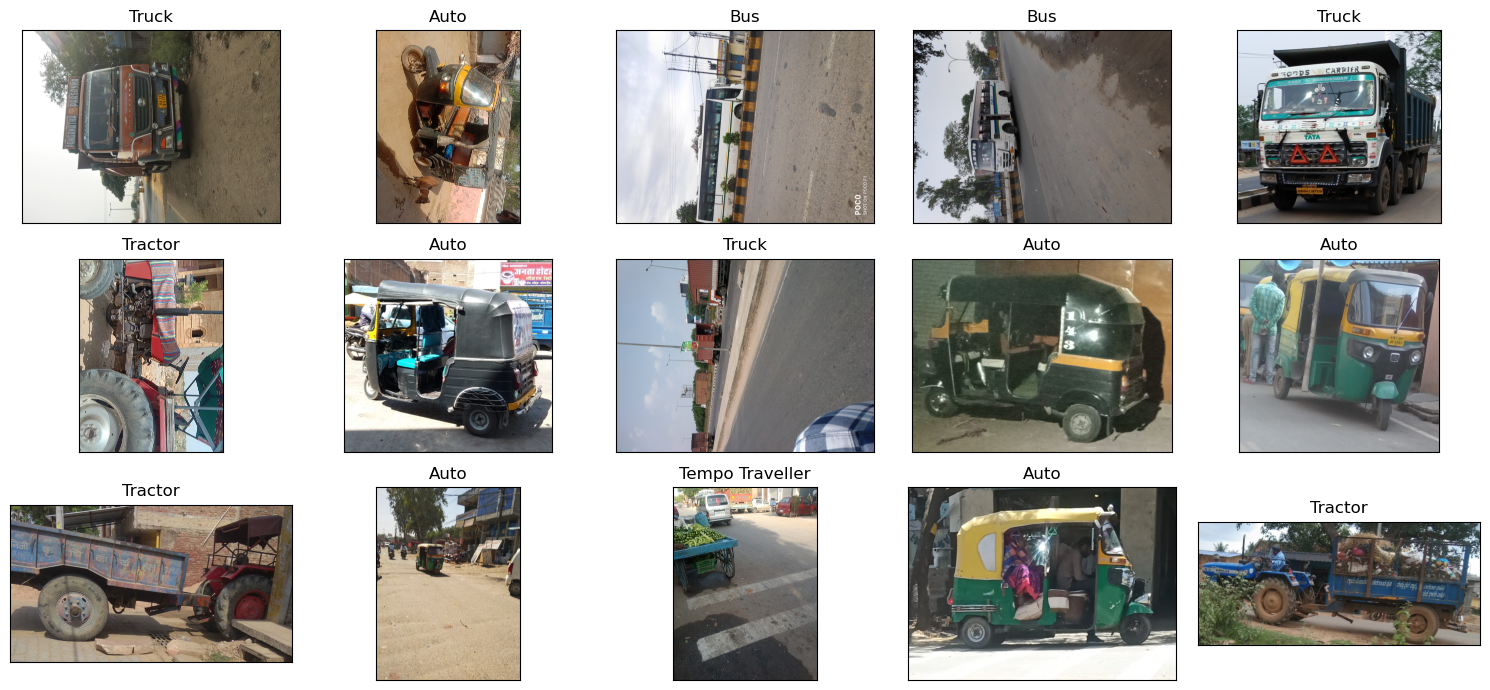

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = plt.imread(im_df.Filepath[i])
    ax.imshow(img)
    ax.set_title(im_df.Label[i])
plt.tight_layout()
plt.show()

In [15]:
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [16]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define your model
# model = Sequential()

# # Input layer
# model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Convolutional layers
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten the output for fully connected layers
# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(5, activation='softmax'))

# # Compile the model
# model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Save the model
# # model.save('custom_cnn_model.h5')

In [17]:
from keras.applications.vgg16 import preprocess_input
import cv2
# Define a custom preprocessing function
def custom_preprocess_input(image):
    # Resize the image to a specific size (e.g., 224x224)
    image = cv2.resize(image, (224, 224))
    # Apply mean subtraction
    image = image - [123.68, 116.78, 103.94]  # Mean values for BGR channels
    # Perform any other desired preprocessing steps
    
    return image

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=20,         # Random rotation
    width_shift_range=0.2,    # Random horizontal shift
    height_shift_range=0.2,   # Random vertical shift
    horizontal_flip=True,     # Random horizontal flip
    zoom_range=0.2,  # Random zoom
    validation_split = 0.1
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=20,         # Random rotation
    width_shift_range=0.2,    # Random horizontal shift
    height_shift_range=0.2,   # Random vertical shift
    horizontal_flip=True,     # Random horizontal flip
    zoom_range=0.2            # Random zoom
)

In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 412 validated image filenames belonging to 5 classes.
Found 45 validated image filenames belonging to 5 classes.
Found 115 validated image filenames belonging to 5 classes.


In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# # Train the model
# model.fit(train_images, validation_data=val_images, epochs=20)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(5, activation='softmax')(x)  # num_classes is the number of vehicle classes

model = models.Model(inputs=base_model.input, outputs=predictions)

# Fine-tune some top layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your data generator (train_images)
model.fit(train_images, epochs=50, validation_data=val_images)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
13/13 [==============================] - 67s 4s/step - loss: 1.6230 - accuracy: 0.3204 - val_loss: 1.4858 - val_accuracy: 0.3778
Epoch 2/50
13/13 [==============================] - 37s 3s/step - loss: 1.5035 - accuracy: 0.2937 - val_loss: 1.4181 - val_accuracy: 0.4222
Epoch 3/50
13/13 [==============================] - 38s 3s/step - loss: 1.4081 - accuracy: 0.4053 - val_loss: 1.3287 - val_accuracy: 0.4444
Epoch 4/50
13/13 [==============================] - 36s 3s/step - loss: 1.3339 - accuracy: 0.5073 - val_loss: 1.3358 - val_accuracy: 0.4667
Epoch 5/50
13/13 [==============================] - 35s 3s/step - loss: 1.3034 - accuracy: 0.4830 - val_loss: 1.2558 - val_accuracy: 0.4889
Epoch 6/50
13/13 [==============================] - 35s 3s/step - loss: 1.2406 - accuracy: 0.5316 - val_loss: 1.2153 - val_accuracy: 0.6000
Epoch 7/50
13/13 [==============================] - 35s 3s/step - loss: 1.2370 - accuracy: 0.53

In [20]:
# import os
# import shutil

# # Define the source directory containing the files you want to copy
# source_dir = '/kaggle/input/indian-vehicle-dataset/Vehicle_5_classes_sample/'

# # Define the destination directory where you have write access
# destination_dir = '/kaggle/working/valid_images/'

# # Ensure the destination directory exists, and create it if necessary
# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# # List of valid file extensions (adjust to your needs)
# valid_extensions = ['.jpg', '.png']

# # Iterate through files in the source directory
# for root, dirs, files in os.walk(source_dir):
#     for file in files:
#         if os.path.splitext(file)[1] in valid_extensions:
#             source_file = os.path.join(root, file)
#             destination_file = os.path.join(destination_dir, file)
            
#             # Copy the valid file to the destination directory
#             shutil.copy(source_file, destination_file)

# print("Valid files have been copied to the destination directory:", destination_dir)


In [21]:
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import VGG16

# # Load pre-trained ResNet50 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Add custom classification layers
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dense(128, activation='relu')(x)
# predictions = layers.Dense(5, activation='softmax')(x)  # num_classes is the number of vehicle classes

# model = models.Model(inputs=base_model.input, outputs=predictions)

# # Fine-tune some top layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model using your data generator (train_images)
# model.fit(train_images, epochs=50, validation_data=val_images)

In [22]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss:",(results[0]))
print("Test Accuracy:",(results[1] * 100),"%")

    Test Loss: 1.1091252565383911
Test Accuracy: 55.65217137336731 %


In [29]:
import cv2
import numpy as np

# Load and preprocess the image
image_path = '/kaggle/input/cleaned-vehicle-dataset/Vehicle_5_classes_sample/Auto/Datacluster Auto (11).jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize the image to match your model's input size
image = image / 255.0  # Normalize the pixel values

# Make predictions
predictions = model.predict(np.expand_dims(image, axis=0))  # Add a batch dimension
print(predictions)
# The 'predictions' variable now contains the predicted probabilities for each class.
# You can use np.argmax(predictions) to find the index of the class with the highest probability.

# For example, if you want to find the class with the highest probability:
predicted_class = np.argmax(predictions)

# You might also want to decode the class index to get the class label based on your dataset.
class_labels = ["Auto", "Bus", "Tempo", "Tractor", "Truck"]
predicted_label = class_labels[predicted_class]

# Print the predicted class label
print("Predicted Class:", predicted_label)

1/1 [==============================] - 0s 21ms/step
[[0.7348476  0.12729186 0.04851674 0.01968112 0.06966276]]
Predicted Class: Auto


In [ ]:
# mkdir /kaggle/working/my_env
# python -m venv /kaggle/working/my_env

In [2]:
# import cv2

# cap = cv2.VideoCapture('/kaggle/input/sample-video/Vehicle_count_test.mp4')
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Set the window size to match the frame size
#     cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
#     cv2.resizeWindow('Video', frame.shape[1], frame.shape[0])

#     cv2.imshow('Video', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()
# import cv2
# from IPython.display import display, clear_output, Video

# # Define the path to the uploaded video file
# video_path = '/kaggle/input/sample-video/Vehicle_count_test.mp4'

# # Create a Video widget to display the video in the notebook
# video = Video(video_path, embed=True)

# # Display the video in the notebook
# display(video)

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1255: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [1]:
# from time import sleep

# min_width=80 #minimum width of rectangle
# min_height=80 #minimum height of rectangle

# offset=6 #allowable error between pixel 

# post=1800 #position of line

# # delay= 1#FPS do vídeo

# detect = []
# counter =0

	
# def center_handle(x, y, w, h):
#     x1 = int(w / 2)
#     y1 = int(h / 2)
#     cx = x + x1
#     cy = y + y1
#     return cx,cy

# cap = cv2.VideoCapture('/kaggle/input/sample-video/Vehicle_count_test.mp4')
# al = cv2.createBackgroundSubtractorMOG2()


# while cap.isOpened():
#     ret, frame1 = cap.read()
#     if not ret:
#         break
#     grey = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
#     blur = cv2.GaussianBlur(grey,(3,3),5)
#     img_sub = al.apply(blur)
#     dilat = cv2.dilate(img_sub,np.ones((5,5)))
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#     dilatada = cv2.morphologyEx (dilat, cv2. MORPH_CLOSE , kernel)
#     dilatada = cv2.morphologyEx (dilatada, cv2. MORPH_CLOSE , kernel)
#     cou,h=cv2.findContours(dilatada,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
#     cv2.line(frame1, (25, post), (7000, post), (255,127,0), 3) 
#     for(i,c) in enumerate(cou):
#         (x,y,w,h) = cv2.boundingRect(c)
#         validate_counter = (w >= min_width) and (h >= min_height)
#         if not validate_counter:
#             continue

#         cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)        
#         center = center_handle(x, y, w, h)
#         detect.append(center)
#         cv2.circle(frame1, center, 4, (0, 0,255), -1)

#         for (x,y) in detect:
#             if y<(post+offset) and y>(post-offset):
#                 counter+=1
#                 cv2.line(frame1, (25, post), (7000, post), (0,127,255), 3)  
#                 detect.remove((x,y))
#                 print("car is detected : "+str(counter))        
       
#     cv2.putText(frame1, "VEHICLE COUNT : "+str(counter), (450, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255),5)
#     # Set the window size to match the frame size
#     # Set the window size to match the frame size
#     cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
#     cv2.resizeWindow('Video', frame1.shape[1], frame1.shape[0])
#     # height, width, _ = frame1.shape
#     # new_height = 720  # Desired height
#     # new_width = int((new_height / height) * width)
#     # frame = cv2.resize(frame1, (new_width, new_height))
#     new_window_size = (800, 600)
    
#     cv2.namedWindow('Video', cv2.WINDOW_NORMAL)  # Create a resizable window
#     cv2.resizeWindow('Video', new_window_size[0], new_window_size[1])
    
#     cv2.imshow('Video', frame1,)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# # cv2.destroyAllWindows()

NameError: name 'cv2' is not defined